# Desarrollo de juegos evolutivos

## Librerías

In [148]:
using Statistics, DataFrames, Plots

## 1. Definición de los parametros del juego

In [149]:
n_jugadores = 200
ciclos = 50000

50000

## 2. Definición de la función de juego

In [150]:
function juego(jugadores_A, jugadores_B, matriz_de_pagos_A, matriz_de_pagos_B)
    # Generación de un número aleatorio para determinar el orden de los
    # jugadores
    jugadores_A[:, 3] = rand(n_jugadores)
    jugadores_B[:, 3] = rand(n_jugadores)

    # Ordenación de los jugadores
    jugadores_A = sortslices(jugadores_A, dims = 1, by = x -> x[3])
    jugadores_B = sortslices(jugadores_B, dims = 1, by = x -> x[3])

    # Vector de pagos
    vector_pago_A = zeros(n_jugadores)
    vector_pago_B = zeros(n_jugadores)
    
    for i_jugador in 1:n_jugadores

        # Jugador A
        # Determinación del pago del jugador A
        vector_pago_A[Int(i_jugador)] += matriz_de_pagos_A[Int(jugadores_A[Int(i_jugador), 1]), Int(jugadores_B[Int(i_jugador), 1])]
        
        # Jugador B
        # Determinación del pago del jugador B
        vector_pago_B[Int(i_jugador)] += matriz_de_pagos_B[Int(jugadores_B[Int(i_jugador), 1]), Int(jugadores_A[Int(i_jugador), 1])]
    end
    return vector_pago_A, vector_pago_B
end

juego (generic function with 1 method)

## 3. Definición de la función de mutación

In [151]:
function mutacion(jugadores, matriz_pagos, jugador)
    n_j = size(jugadores)[1]
    
    # Si el número aleatorio es menor a 0.01, se genera una estrategia aleatoria
    for i in 1:n_j
        if rand() < 0.01
            jugadores[Int(i), 1] = rand(1:Int(size(matriz_pagos)[jugador]), 1)[1]
        end
    end
        
    return jugadores
end

mutacion (generic function with 1 method)

## 4. Definición de la función de reproducción

In [152]:
function reproduccion(f_jugadores_A, f_jugadores_B)
    # Selección de los jugadores con mayor pago
    f_jugadores_A = sortslices(f_jugadores_A, dims = 1, by = x -> x[2])
    f_jugadores_B = sortslices(f_jugadores_B, dims = 1, by = x -> x[2])

    # Selección del 5% los jugadores con mayor pago
    n_5 = round(n_jugadores*0.05)
    mejores_A = f_jugadores_A[Int(n_jugadores-n_5+1):end, :]
    mejores_B = f_jugadores_B[Int(n_jugadores-n_5+1):end, :]
    
    # Mutación
    mejores_A = mutacion(mejores_A, matriz_de_pagos_A, 1)
    mejores_B = mutacion(mejores_B, matriz_de_pagos_B, 2)

    # Remplazo de los jugadores con menor pago por los mejores
    f_jugadores_A[1:Int(n_5), 1] = mejores_A[:, 1]
    f_jugadores_B[1:Int(n_5), 1] = mejores_B[:, 1]

    return f_jugadores_A, f_jugadores_B
end

reproduccion (generic function with 1 method)

## 5. Definición de las estrategias
Definición de pagos de las estrategias para dos tipos de jugadores (A y B).

In [153]:
matriz_de_pagos_A = [
    3 1;
    4 0
    ]
matriz_de_pagos_B = [
    3 4;
    1 0
    ]


2×2 Matrix{Int64}:
 3  4
 1  0

## 6. Definición de la población inicial
Generación de la población inicial en matrices donde se almacenan las
estrategias de los jugadores, los pagos de los jugadores y un número
aleatorio para determinar el orden de los jugadores

In [154]:
# Matriz para cada tipo de jugadores (n_jugadores x 3)
jugadores_A = zeros(n_jugadores, 3)
jugadores_B = zeros(n_jugadores, 3)

# Matriz de estrategias, primera columna para cada tipo de jugador
jugadores_A[:, 1] = rand(1:size(matriz_de_pagos_A)[1], n_jugadores)
jugadores_B[:, 1] = rand(1:size(matriz_de_pagos_A)[2], n_jugadores)

200-element Vector{Int64}:
 1
 2
 2
 1
 2
 2
 1
 1
 2
 2
 ⋮
 1
 2
 2
 1
 2
 2
 2
 1
 2

## 7. Ejecución del juego
Data frame con el conteo por cada estrategia para cada tipo de jugador en cada ciclo

In [167]:
using CSV

for sim in 1:20
    df_A = DataFrame(
        ciclo = Int[],
        C = Int[],
        NC = Int[]
        )

    df_B = DataFrame(
        ciclo = Int[],
        C = Int[],
        NC = Int[]
        )

    for i in 1:ciclos
        if i % 10000 == 0
            println(i)
        end

        # Reproducción
        if i % 100 == 0
            jugadores_A, jugadores_B = reproduccion(jugadores_A, jugadores_B)
        end

        # Juego
        vector_pago_A, vector_pago_B = juego(jugadores_A, jugadores_B, matriz_de_pagos_A, matriz_de_pagos_B)
        jugadores_A[:, 2] += vector_pago_A[:]
        jugadores_B[:, 2] += vector_pago_B[:]

        # Actualización de los data frames
        push!(df_A, [
            i,
            sum(jugadores_A[:, 1] .== 1),
            sum(jugadores_A[:, 1] .== 2)
            ])
        push!(df_B, [
            i,
            sum(jugadores_B[:, 1] .== 1),
            sum(jugadores_B[:, 1] .== 2)
            ])
    end

    # Save the data frames for each simulation
    CSV.write("C:\\Users\\esnei\\Desktop\\game_theory\\simulacion$(sim)A.csv", df_A) 
    CSV.write("C:\\Users\\esnei\\Desktop\\game_theory\\simulacion$(sim)B.csv", df_B) 
end


10000


20000


30000


40000


50000


10000


20000


30000


40000


50000


10000


20000


30000


40000


50000


10000


20000


30000


40000


50000


10000


20000


30000


40000


50000


10000


20000


30000


40000


50000


10000


20000


30000


40000


50000


10000


20000


30000


40000


50000


10000


20000


30000


40000


50000


10000


20000


30000


40000


50000


10000


20000


30000


40000


50000


10000


20000


30000


40000


50000


10000


20000


30000


40000


50000


10000


20000


30000


40000


50000


10000


20000


30000


40000


50000


10000


20000


30000


40000


50000


10000


20000


30000


40000


50000


10000


20000


30000


40000


50000


10000


20000


30000


40000


50000


10000


20000


30000


40000


50000


## 8. Grafico de los resultados

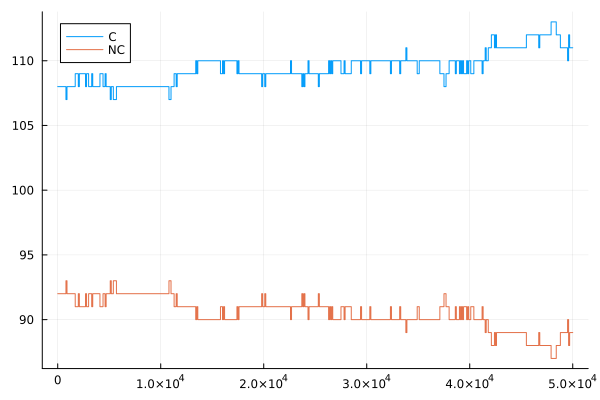

In [164]:
plot(
    df_A.ciclo,
    [df_A.C,
    df_A.NC],
    label = ["C" "NC"]
    )

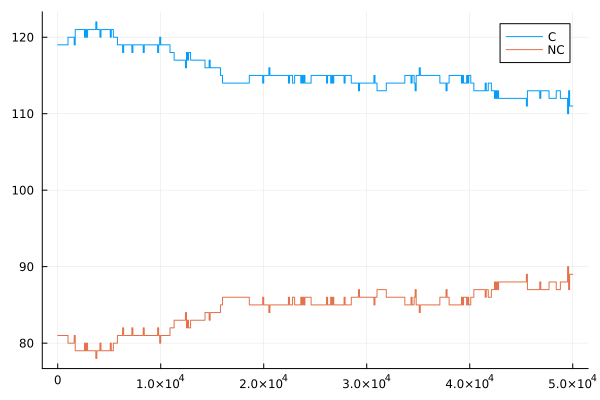

In [165]:
# Gráfico de los resultados
plot(
    df_B.ciclo,
    [df_B.C,
    df_B.NC],
    label = ["C" "NC"]
    )

In [166]:
using CSV

CSV.write("C:\\Users\\esnei\\Desktop\\game_theory\\simulacion10A.csv", df_A) 
CSV.write("C:\\Users\\esnei\\Desktop\\game_theory\\simulacion10B.csv", df_B) 


"C:\\Users\\esnei\\Desktop\\game_theory\\simulacion09B.csv"